### Categorical data

In [1]:
import pandas as pd
import numpy as np

In [2]:
adult = pd.read_csv('adult.csv')
adult.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print(adult["Above/Below 50k"].describe())
print(50*'#')
print(adult["Above/Below 50k"].value_counts())
print(50*'#')
print(adult["Above/Below 50k"].value_counts(normalize=True))

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object
##################################################
 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64
##################################################
 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


In [4]:
adult.dtypes

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object

In [5]:
adult['Marital Status'].dtype

dtype('O')

In [6]:
adult['Marital Status'].nbytes

260488

In [7]:
adult['Marital Status'] = adult['Marital Status'].astype('category')
adult['Marital Status'].nbytes

32617

In [8]:
adult_types = {'Marital Status':'category'}
adult = pd.read_csv('adult.csv', dtype=adult_types)
adult.dtypes

Age                   int64
Workclass            object
fnlgwt                int64
Education            object
Education Num         int64
Marital Status     category
Occupation           object
Relationship         object
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k      object
dtype: object

In [9]:
adult['Marital Status'].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
                 ordered=False)

In [10]:
list_occupations = ['Data Scientist',
 'Data Analyst',
 'Data Scientist',
 'Statistician',
 'Data Scientist',
 'Data Scientist',
 'Statistician',
 'Data Scientist']
series1 = pd.Series(list_occupations, dtype = 'category')
series1

0    Data Scientist
1      Data Analyst
2    Data Scientist
3      Statistician
4    Data Scientist
5    Data Scientist
6      Statistician
7    Data Scientist
dtype: category
Categories (3, object): [Data Analyst, Data Scientist, Statistician]

In [11]:
medals = ['Silver',
 'Silver',
 'Bronze',
 'Silver',
 'Gold',
 'Silver',
 'Silver',
 'Gold',
 'Gold']
series = pd.Categorical(medals, categories = ['Bronze', 'Silver', 'Gold'], ordered = True)
series

[Silver, Silver, Bronze, Silver, Gold, Silver, Silver, Gold, Gold]
Categories (3, object): [Bronze < Silver < Gold]

#### Assign 'category' data

In [12]:
adult_dtypes = {
  'Workclass':'category',
  'Education':'category',
  'Relationship':'category',
  'Above/Below 50k':'category'
}

In [13]:
adult = pd.read_csv('adult.csv', dtype = adult_dtypes)
adult.dtypes

Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object

#### Groupby

In [14]:
gb = adult.groupby(by=['Sex', 'Above/Below 50k'])
gb.size()

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64

In [15]:
gb.mean()

Age         fnlgwt  Education Num  \
Sex     Above/Below 50k                                            
 Female  <=50K           36.210801  185999.381359       9.820475   
         >50K            42.125530  183687.406277      11.787108   
 Male    <=50K           37.147012  193093.609268       9.452142   
         >50K            44.625788  188769.101321      11.580606   

                         Capital Gain  Capital Loss  Hours/Week  
Sex     Above/Below 50k                                          
 Female  <=50K             121.986134     47.364470   35.916701  
         >50K             4200.389313    173.648855   40.426633  
 Male    <=50K             165.723823     56.806782   40.693879  
         >50K             3971.765836    198.780396   46.366106

In [16]:
user_list = ['Education', 'Above/Below 50k']
gb = adult.groupby(by = user_list)
gb['Hours/Week'].mean()

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

#### Working with categories

In [17]:
dogs = pd.read_csv('ShelterDogs.csv')
dogs.shape

(2937, 19)

In [18]:
dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,yes,yes,yes,yes,NaN
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dogs['keep_in'].value_counts(dropna = False)

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64

In [20]:
dogs["keep_in"] = dogs["keep_in"].astype("category")
dogs['keep_in'].dtype

CategoricalDtype(categories=['both flat and garden', 'flat', 'garden'], ordered=False)

In [21]:
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories = new_categories)
dogs['keep_in'].value_counts(dropna=False)

both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Open Yard (Countryside)       0
Unknown History               0
Name: keep_in, dtype: int64

#### Some important methods

In [22]:
dogs.likes_children.dtype

dtype('O')

In [23]:
dogs['likes_children'] = dogs['likes_children'].astype('category')

In [24]:
dogs.likes_children.value_counts(dropna=False)

NaN    1718
yes    1172
no       47
Name: likes_children, dtype: int64

In [25]:
dogs["likes_children"] = dogs['likes_children'].fillna('no')

In [26]:
dogs.likes_children.value_counts(dropna = False)

no     1765
yes    1172
Name: likes_children, dtype: int64

In [27]:
dogs['likes_children'].cat.categories

Index(['no', 'yes'], dtype='object')

In [28]:
my_changes = {'yes':'Yes', 'no':'No'}
dogs["likes_children"] = dogs['likes_children'].cat.rename_categories(my_changes)
dogs.likes_children.value_counts()

No     1765
Yes    1172
Name: likes_children, dtype: int64

In [29]:
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())
dogs['likes_children'].cat.categories

Index(['NO', 'YES'], dtype='object')

#### Collapsing categories

In [31]:
dogs.coat.dtype

dtype('O')

In [32]:
dogs.coat.value_counts(dropna=False)

short         1972
medium         565
wirehaired     220
long           180
Name: coat, dtype: int64

In [33]:
update_coats = {'wirehaired':'medium', 'medium':'medium'}
dogs["coat_collapsed"] = dogs['coat'].replace(update_coats)
dogs['coat_collapsed'] = dogs['coat_collapsed'].astype('category')
dogs['coat_collapsed'].value_counts()

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64

#### Reordering categories

In [43]:
dogs = pd.read_csv('ShelterDogs.csv')
print(dogs.size.dtype)
print(dogs['size'].dtype)

int32
object


In [44]:
dogs['size']=dogs['size'].astype('category')
dogs['size'].cat.categories

Index(['large', 'medium', 'small'], dtype='object')

In [45]:
dogs["size"] = dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"])
dogs['size'].dtype

CategoricalDtype(categories=['small', 'medium', 'large'], ordered=False)

In [46]:
dogs["size"] = dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered = True
)
dogs['size'].dtype

CategoricalDtype(categories=['small', 'medium', 'large'], ordered=True)

In [47]:
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace = True
)

In [48]:
dogs['size'].cat.categories

Index(['small', 'medium', 'large'], dtype='object')

In [49]:
print(dogs.groupby('size')['sex'].value_counts())
print(50*'#')
print(dogs.groupby('size')['keep_in'].value_counts(normalize=True))

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
##################################################
size    keep_in             
small   both flat and garden    0.702065
        flat                    0.235988
        garden                  0.061947
medium  both flat and garden    0.657568
        garden                  0.262200
        flat                    0.080232
large   both flat and garden    0.519022
        garden                  0.467391
        flat                    0.013587
Name: keep_in, dtype: float64


In [50]:
dogs = pd.read_csv('ShelterDogs.csv')
dogs['size']=dogs['size'].astype('category')
print(dogs.groupby('size')['sex'].value_counts())

size    sex   
large   male       331
        female     188
medium  male      1090
        female     854
small   male       260
        female     214
Name: sex, dtype: int64


#### Cleaning categorical data

#### Whitespace

dogs['colum1'] = dogs['column1'].str.strip()


#### Capitalization

dogs['colum1'] = dogs['column1'].str.title()

dogs['colum1'] = dogs['column1'].str.upper()

dogs['colum1'] = dogs['column1'].str.lower()


#### Mispelling

replace_map = {'NoOon':'No'}

dogs['column1'].replace(replace_map, inplace = True)


#### Searching for a string

dogs['column1'].str.contains('Word', regex = False)

In [52]:
print(dogs[dogs["breed"].str.contains('English', regex=False)].shape[0])

35


### Visualization

In [54]:
reviews = pd.read_csv('lasvegas_tripadvisor.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Catplot

**x** = variable

**y** = variable

**data** = dataframe

**kind** = type of plot to create (strip, swarm, box, violin, boxen, point, bar, count)

sns.set(font_scale = 1.4)

sns.set_style('whitegrid')

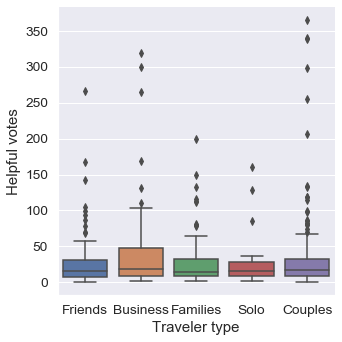

In [56]:
sns.set(font_scale = 1.25)
sns.set_style('darkgrid')
sns.catplot(x = 'Traveler type', y = 'Helpful votes', data = reviews, kind = 'box')
plt.show()

#### Hue

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


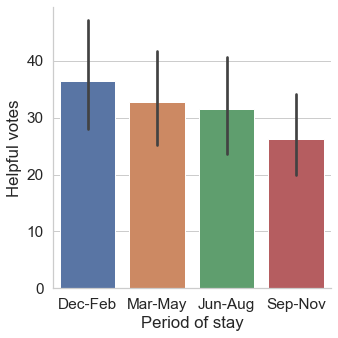

In [57]:
print(reviews['Period of stay'].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")
sns.catplot(x = 'Period of stay', y = 'Helpful votes', data = reviews, kind = 'bar')
plt.show()

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64


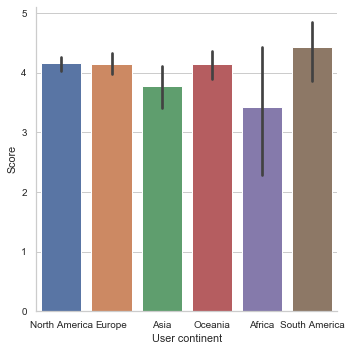

In [58]:
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")

print(reviews['User continent'].value_counts())

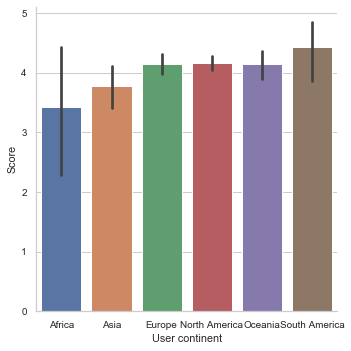

In [59]:
reviews["User continent"] = reviews['User continent'].astype('category')

sns.catplot(x = 'User continent', y="Score", data=reviews, kind="bar")
plt.show()

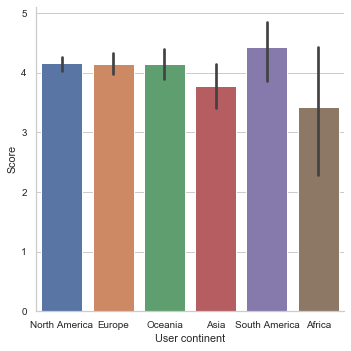

In [60]:
continent_categories = list(reviews["User continent"].value_counts().index)

reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories = continent_categories)

sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

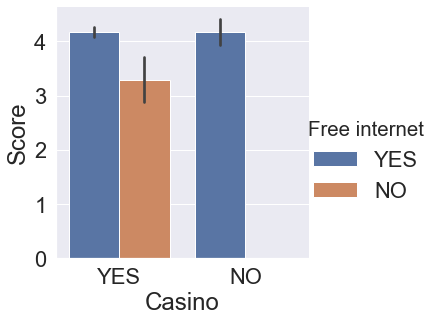

In [61]:
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x = 'Casino', y="Score", data=reviews, kind="bar", hue = 'Free internet')
plt.show()

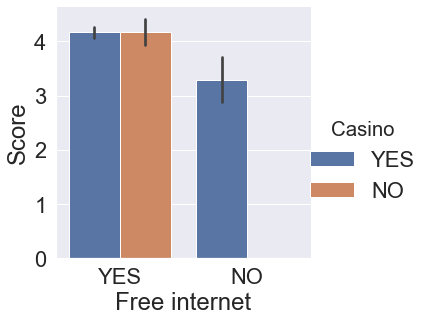

In [62]:
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x='Free internet', y="Score", data=reviews, kind="bar", hue='Casino')
plt.show()

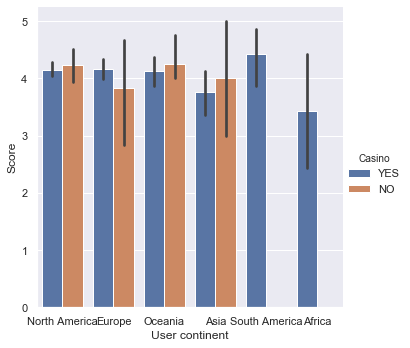

In [64]:
sns.set(font_scale=1)
sns.set_style("darkgrid")
sns.catplot(x='User continent', y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

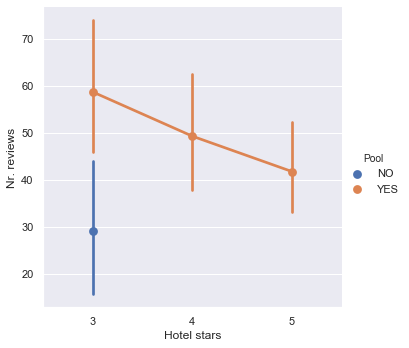

In [67]:
sns.catplot(
  x = 'Hotel stars',
  y = 'Nr. reviews',
  data=reviews,
  kind = 'point',
  hue="Pool"#,
  #dodge = True
)
plt.show()

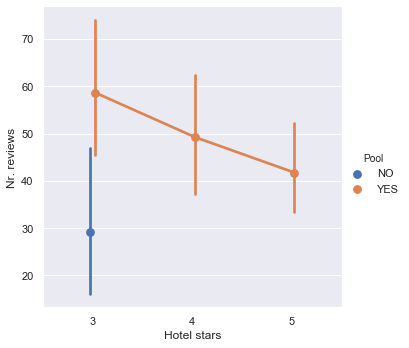

In [68]:
sns.catplot(
  x = 'Hotel stars',
  y = 'Nr. reviews',
  data=reviews,
  kind = 'point',
  hue="Pool",
  dodge = True
)
plt.show()

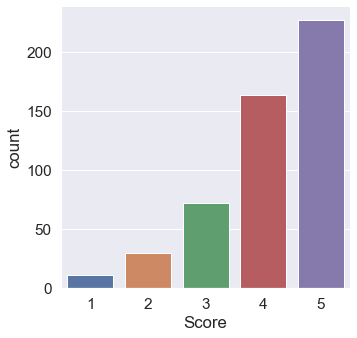

In [70]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

sns.catplot(
  x="Score",
  data=reviews,
  kind="count"#,
  #hue="Traveler type"
)
plt.show()

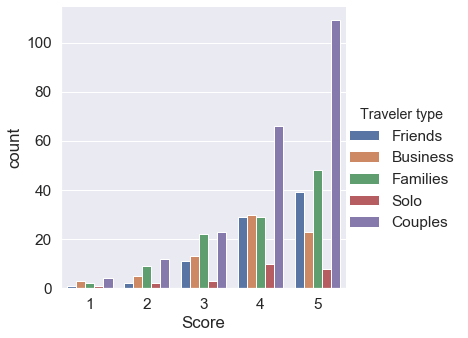

In [71]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

sns.catplot(
  x="Score",
  data=reviews,
  kind="count",
  hue="Traveler type"
)
plt.show()

1: a graphical form of a frequency table then **kind = 'count'**
    
2: has the parameters, join and dodge, which can update the look of the lines in the plot then **kind = 'point'**

3: can be used to see the distribution and outliers of a numeric column  then **kind = 'box'**

4: is similar to a point plot and can be used to see the central tendency of numerical data then **kind = 'bar'**

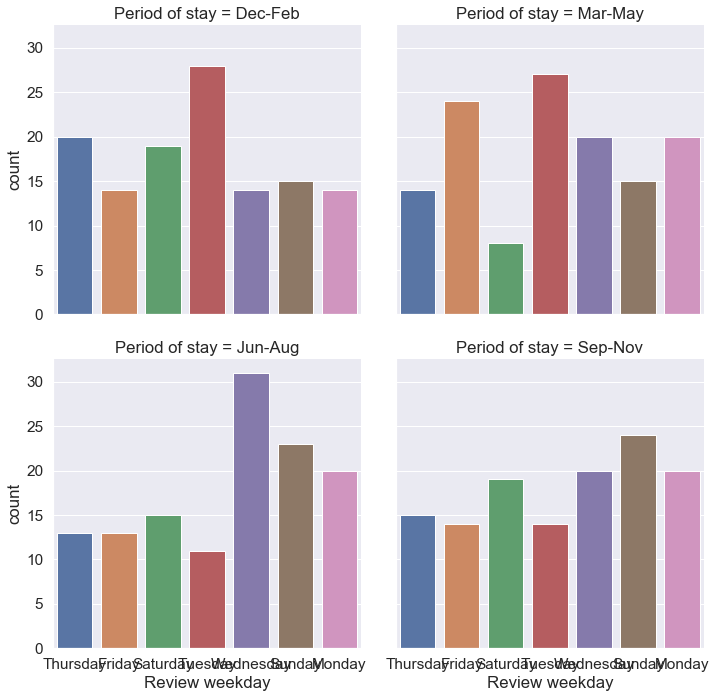

In [72]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  x = 'Review weekday',
  col = 'Period of stay',
  kind = 'count',
  # Wrap the plots after every 2nd graphic.
  col_wrap = 2,
  data=reviews
)
plt.show()

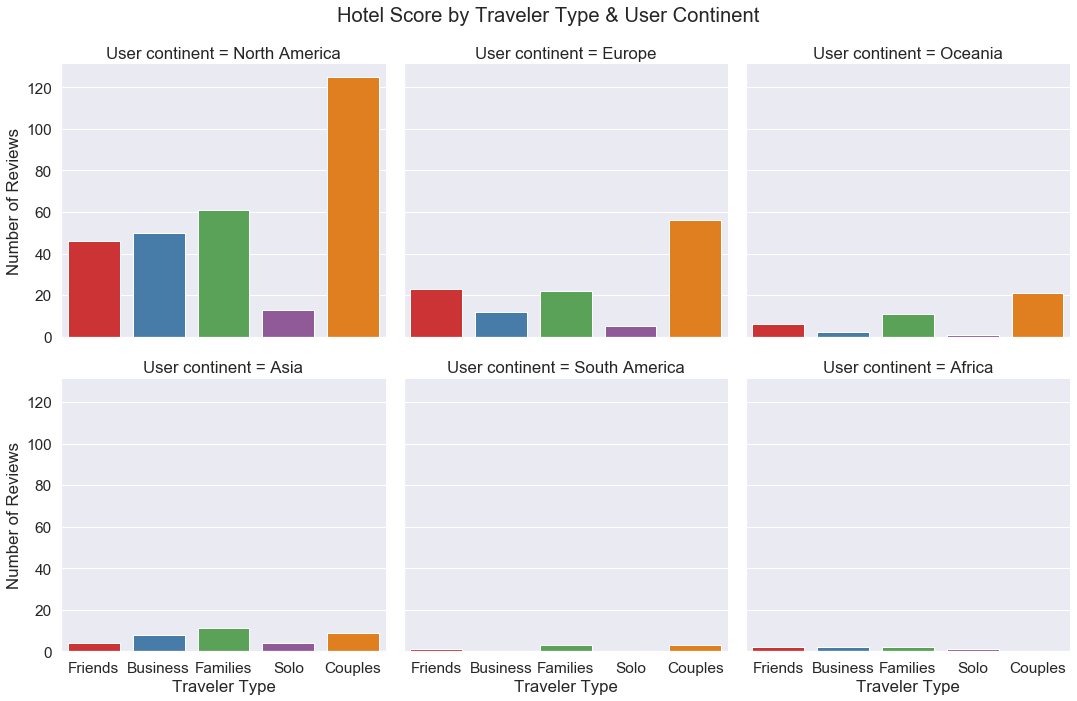

In [73]:
ax = sns.catplot(x="Traveler type", 
                 col="User continent", 
                 col_wrap=3, kind="count", 
                 palette=sns.color_palette("Set1"), 
                 data=reviews)
ax.fig.suptitle("Hotel Score by Traveler Type & User Continent")
ax.set_axis_labels("Traveler Type", "Number of Reviews")
plt.subplots_adjust(top=.9)
plt.show()

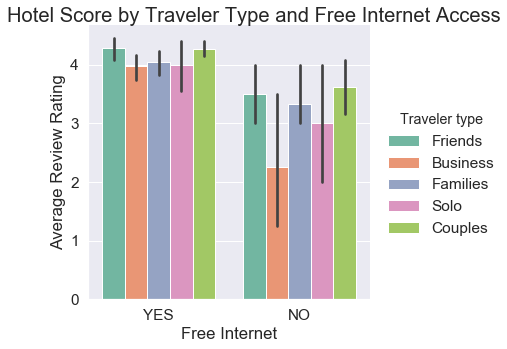

In [74]:
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
ax.set_axis_labels("Free Internet", "Average Review Rating")

plt.subplots_adjust(top=.93)
plt.show()

### Pitfalls and encoding

In [75]:
used_cars = pd.read_csv('cars.csv')
used_cars

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [77]:
print(used_cars["body_type"].value_counts(dropna=False))
#in case:
#used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64


In [79]:
used_cars.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [80]:
#Errors

#used_cars['Sale Rating'] = used_cars["Sale Rating"].astype('category'))



# Find the average score

#average_score = used_cars["Sale Rating"].mean() <- error
#average_score = used_cars["Sale Rating"].astype('int').mean()

In [81]:
used_cars['manufacturer_name'] = used_cars['manufacturer_name'].astype('category')

In [82]:
used_cars['manufacturer_code'] = used_cars['manufacturer_name'].cat.codes

In [83]:
used_cars[['manufacturer_name', 'manufacturer_code']]

,manufacturer_name,manufacturer_code
0,Subaru,45
1,Subaru,45
2,Subaru,45
3,Subaru,45
4,Subaru,45
...,...,...
38526,Chrysler,8
38527,Chrysler,8
38528,Chrysler,8
38529,Chrysler,8


In [86]:
codes = used_cars['manufacturer_name'].cat.codes
categories = used_cars['manufacturer_name']
name_map = dict(zip(codes, categories))
name_map

{45: 'Subaru',
 24: 'LADA',
 12: 'Dodge',
 54: 'УАЗ',
 23: 'Kia',
 35: 'Opel',
 53: 'Москвич',
 1: 'Alfa Romeo',
 0: 'Acura',
 10: 'Dacia',
 27: 'Lexus',
 33: 'Mitsubishi',
 25: 'Lancia',
 9: 'Citroen',
 32: 'Mini',
 21: 'Jaguar',
 38: 'Porsche',
 44: 'SsangYong',
 11: 'Daewoo',
 15: 'Geely',
 50: 'ВАЗ',
 13: 'Fiat',
 14: 'Ford',
 39: 'Renault',
 42: 'Seat',
 40: 'Rover',
 48: 'Volkswagen',
 28: 'Lifan',
 22: 'Jeep',
 5: 'Cadillac',
 2: 'Audi',
 52: 'ЗАЗ',
 47: 'Toyota',
 51: 'ГАЗ',
 49: 'Volvo',
 7: 'Chevrolet',
 16: 'Great Wall',
 4: 'Buick',
 37: 'Pontiac',
 29: 'Lincoln',
 18: 'Hyundai',
 34: 'Nissan',
 46: 'Suzuki',
 3: 'BMW',
 30: 'Mazda',
 26: 'Land Rover',
 20: 'Iveco',
 43: 'Skoda',
 41: 'Saab',
 19: 'Infiniti',
 6: 'Chery',
 17: 'Honda',
 31: 'Mercedes-Benz',
 36: 'Peugeot',
 8: 'Chrysler'}

In [91]:
used_cars = pd.read_csv('cars.csv')
used_cars['manufacturer_name'] = used_cars['manufacturer_name'].astype('category')
used_cars['manufacturer_code'] = used_cars['manufacturer_name'].cat.codes
used_cars['manufacturer_code'].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_code, Length: 38531, dtype: object

In [93]:
used_cars['body_type'].str.contains('van', regex = False)

0        False
1        False
2        False
3        False
4        False
         ...  
38526    False
38527    False
38528    False
38529     True
38530     True
Name: body_type, Length: 38531, dtype: bool

In [94]:
used_cars['van_code'] = np.where(used_cars['body_type'].str.contains('van', regex = False),1,0)
used_cars.van_code.value_counts()

0    34115
1     4416
Name: van_code, dtype: int64

In [95]:
used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64


In [97]:
used_cars["color_code"] = used_cars["color"].cat.codes

codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))
color_map

{8: 'silver',
 1: 'blue',
 7: 'red',
 0: 'black',
 4: 'grey',
 6: 'other',
 2: 'brown',
 10: 'white',
 3: 'green',
 9: 'violet',
 5: 'orange',
 11: 'yellow'}

#EXAMPLE

# Update the color column using the color_map
used_cars_updated["color"] = used_cars_updated['color'].map(color_map)
# Update the engine fuel column using the fuel_map
used_cars_updated["engine_fuel"] = used_cars_updated['engine_fuel'].map(fuel_map)
# Update the transmission column using the transmission_map
used_cars_updated["transmission"] = used_cars_updated['transmission'].map(transmission_map)

# Print the info statement
print(used_cars_updated.info())

In [98]:
# Print the manufacturer name frequency table
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column based on if the manufacturer name that contain Volkswagen
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains('Volkswagen', regex=False), True, False
)

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [99]:
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column for the most common manufacturer name
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)
  
# Check the final frequency table
print(used_cars['is_volkswagen'].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

### One-hot encoding

In [102]:
df = used_cars[['odometer_value','color']]

In [104]:
df.shape

(38531, 2)

In [103]:
used_cars_one_hot = pd.get_dummies(df)
used_cars_one_hot.head()

,odometer_value,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_other,color_red,color_silver,color_violet,color_white,color_yellow
0,190000,0,0,0,0,0,0,0,0,1,0,0,0
1,290000,0,1,0,0,0,0,0,0,0,0,0,0
2,402000,0,0,0,0,0,0,0,1,0,0,0,0
3,10000,0,1,0,0,0,0,0,0,0,0,0,0
4,280000,1,0,0,0,0,0,0,0,0,0,0,0


In [105]:
used_cars_one_hot.shape

(38531, 13)

In [107]:
used_cars_onehot = pd.get_dummies(df, columns = ['color'], prefix = "")
used_cars_onehot.head()

,odometer_value,_black,_blue,_brown,_green,_grey,_orange,_other,_red,_silver,_violet,_white,_yellow
0,190000,0,0,0,0,0,0,0,0,1,0,0,0
1,290000,0,1,0,0,0,0,0,0,0,0,0,0
2,402000,0,0,0,0,0,0,0,1,0,0,0,0
3,10000,0,1,0,0,0,0,0,0,0,0,0,0
4,280000,1,0,0,0,0,0,0,0,0,0,0,0


**NaN** values don't get their own column.

In [108]:
used_cars.shape

(38531, 34)

In [109]:
used_cars_simple = pd.get_dummies(
  used_cars,
  columns = ['manufacturer_name', 'transmission'],
  prefix = 'dummy'
)

print(used_cars_simple.shape)

(38531, 89)
